<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Background-of-our-business-problem" data-toc-modified-id="Background-of-our-business-problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Background of our business problem</a></span></li><li><span><a href="#Load-libraries-and-packages" data-toc-modified-id="Load-libraries-and-packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load libraries and packages</a></span></li><li><span><a href="#Pre-defined-functions" data-toc-modified-id="Pre-defined-functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pre-defined functions</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#DATA-CLEANING" data-toc-modified-id="DATA-CLEANING-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>DATA CLEANING</a></span></li><li><span><a href="#Outlier-Detection" data-toc-modified-id="Outlier-Detection-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Outlier Detection</a></span></li></ul></li><li><span><a href="#Feature-description-after-cleaning" data-toc-modified-id="Feature-description-after-cleaning-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature description after cleaning</a></span><ul class="toc-item"><li><span><a href="#Countplot" data-toc-modified-id="Countplot-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Countplot</a></span></li><li><span><a href="#Histplots" data-toc-modified-id="Histplots-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Histplots</a></span></li><li><span><a href="#Boxplot-and-Violinplot" data-toc-modified-id="Boxplot-and-Violinplot-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Boxplot and Violinplot</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Modelling-training-and-selection" data-toc-modified-id="Modelling-training-and-selection-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modelling training and selection</a></span><ul class="toc-item"><li><span><a href="#Logistic" data-toc-modified-id="Logistic-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Logistic</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#PCA-INCOMPETENCY" data-toc-modified-id="PCA-INCOMPETENCY-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>PCA INCOMPETENCY</a></span></li></ul></li><li><span><a href="#Boosting" data-toc-modified-id="Boosting-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Boosting</a></span><ul class="toc-item"><li><span><a href="#Gradient-Boosting-feature-importance" data-toc-modified-id="Gradient-Boosting-feature-importance-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Gradient Boosting feature importance</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Background of our business problem

In financial and banking world, credit scoring functions as a critical determinant of prosperity and solvency of the clients. As the financial institution aims at maximising its value, the default risk among financial debt is closely monitored to ensure that it meets optimal tolerable level and condition of loan offered. 

In general, various techniques and algorithms are implemented to tackle this concern, requiring the balance of accurate performance and interpretable grounds. Following traditional credit scoring model, this paper employs and assesses the performance among models, specifically *Logistic Regression, Random Forest, and Gradient Boosting*, based on specific one-year credit card users’ data. 

# Load libraries and packages

In [ ]:
!pip install lightgbm
!pip install imblearn
!pip install missingno

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
import lightgbm as lgb
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline as imbpipeline

import missingno as msno

import scipy.stats as stats

# Pre-defined functions

In [2]:
def plot_auc_roc_prec(actual, predicted):
    """plot auc, roc, and precision graphs"""
    fig = plt.figure(figsize = (15,10), dpi = 200)
    rocauc = roc_auc_score(actual, predicted)
    fig.suptitle('AUC score - {:.4f}'.format(rocauc))
    ax1 = plt.subplot(2, 2, 1)
    prec, rec, thresh = precision_recall_curve(actual, predicted)
    ax1.grid()
    ax1.plot(thresh, prec[:-1], label="Precision")
    
    ax1.plot(thresh, rec[:-1], label="Recall")
    ax1.legend(['Precision', 'Recall'])
    ax1.set_xlabel(u"Threshold",fontsize = 15)
    ax1.set_title(u'Precision and Recall lines',fontsize = 15)
    # ax1.legend(fontsize = 15)

    ax2 = plt.subplot(2, 2, 2)
    no_skill = len(actual[actual==1]) / len(actual)
    ax2.plot(rec[:-1],prec[:-1] ,label="Precision/recall")
    ax2.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    ax2.legend(['Precision/recall curve', 'No skill line'])
    ax2.set_xlabel('recall', fontsize = 15)
    ax2.set_ylabel('precision', fontsize = 15)

    ax3 = plt.subplot(2, 2, 3)
    ax3.scatter(actual, predicted,s=100,alpha = 0.01)
    ax3.set_xlabel(u"Labels",fontsize = 15)
    ax3.set_ylabel(u"Predicted probabilities",fontsize = 15)
    ax3.plot([-0.2, 1.2], [0.5, 0.5])
    ax3.axis([-0.1, 1.1, -0.1, 1.1])
    
    ax4 = plt.subplot(2, 2, 4)
    sns.histplot(predicted, ax = ax4)
    ax4.set_title('Distribution of predictions', fontsize = 15)
    
    plt.tight_layout()
    plt.show()
    

def augmentation(df, pos_r = 2, neg_r = 1, split_train_test = True, pca = False):
    """implementing slicing and PCA"""
    if split_train_test:
        df_slice = df[:int(0.7 * len(df))]
        df_test = df[int(0.7 * len(df)):]
        
    xall = df_slice.values
    
    for i in range(pos_r):
        np_pos = df_slice[df_slice['target'] == 1].values
        xall = np.vstack((xall, np_pos))
    for j in range(neg_r):
        np_neg = df_slice[df_slice['target'] == 0].values
        xall = np.vstack((xall, np_neg))  
    
    df_train = pd.DataFrame(xall, columns = df.columns)
    
    if pca:
        pca_comp = 80
        X_train = df_train.drop(['target'], axis = 1).values
        X_test = df_test.drop(['target'], axis = 1).values
        
        pca_true = PCA(n_components=pca_comp)
        X_train = pd.DataFrame(pca_true.fit_transform(X_train), columns = ['pca_' + str(i) for i in range(pca_comp)])
        X_test = pd.DataFrame(pca_true.transform(X_test), columns = ['pca_' + str(i) for i in range(pca_comp)])
        
    else:    
        X_train = df_train.drop(['target'], axis = 1)
        X_test = df_test.drop(['target'], axis = 1)
        
    y_test = df_test.target.values
    y_train = df_train.target.values
    
    X_train['target'] = y_train
    X_test['target'] = y_test
    
    return X_train, X_test
    

def run_complete(model, df, aug = True, pca = True, pca_comp = 80):
    """model running"""
    if aug:
         X_train, X_test, y_train, y_test = augmentation(df)
    else:
        y = df['target'].values
        X = df.drop(['target'], axis = 1)
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, shuffle = True)
            
    if pca:
        pca_true = PCA(n_components=pca_comp)
        X_train = pd.DataFrame(pca_true.fit_transform(X_train), columns = ['pca_' + str(i) for i in range(pca_comp)])
        X_test = pd.DataFrame(pca_true.transform(X_test), columns = ['pca_' + str(i) for i in range(pca_comp)])

    model.fit(X_train, y_train)
    predictions = model.predict_proba(X_test)[:, 1]
    plot_auc_roc_prec(y_test, predictions)

# Preprocessing

## DATA CLEANING

includes eliminating irrelevant data and missing value, combining highly correlated variables, excluding outliers and noise, applying PCA, transforming numerical values, and normalising the variables.

In [3]:
df = pd.read_csv('21160223.txt', sep=r'\t', engine='python')
df.columns = [column.lower() for column in df.columns]

# Eliminate those columns having a single unique value
to_dropd_1 = df.columns[df.nunique() == 1]
df = df.drop(to_dropd_1, axis = 1)
df = df.rename(columns = {'target_label_bad=1' : 'target'})

for column in df.columns:
    if df[column].dtypes == 'object':
        df[column] = df[column].astype(str).apply(lambda x: x.strip().lower())

In [4]:
# check the consistency for professional_state & residencial_state
prof_resid = df[~((df['professional_state'] == '') | (df['professional_state'] == df['residencial_state']))].index

In [5]:
# choose what kind of variables to drop
df['diff_proff_resid'] = 0
df.loc[prof_resid, 'diff_proff_resid'] = 1

drop_for_now = ['residencial_zip_3', 'professional_zip_3']

simply_redundant = ['professional_phone_area_code', 'city_of_birth', 'residencial_city', 
                   'residencial_borough', 'professional_borough', 'professional_city', 
                    'professional_phone_area_code', 'id_client'#, 'mate_profession_code'
                   ]
questionably_redundant = ['residencial_phone_area_code', 'professional_state', 'education_level.1', 
                         #'months_in_the_job'
                         ]

apply_bins = ['quant_dependants', 'months_in_residence', 'age']

replace_str_values = ['flag_residencial_phone','company', 'flag_professional_phone']

make_str = ['residence_type', 'profession_code', 'occupation_type', 'product',
           'payment_day', 'marital_status']

# mate number that selcom appears in the dataset is defined as strange_mate
strange_mate = [12.0,10.0,6.0,13.0, 7.0,8.0,15.0,17.0,14.0,5.0,1.0,3.0,4.0]
df['mate_profession_code'] = df['mate_profession_code'].apply(lambda x: "strange_number" if x in strange_mate else x)
df['mate_profession_code'] = df['mate_profession_code'].fillna('no_num')

df.drop(drop_for_now + simply_redundant + questionably_redundant, axis = 1, inplace = True)

In [6]:
df['months_in_residence'] = df.months_in_residence.fillna(int(df.months_in_residence.median())) # filling with mean

df['quant_special_banking_accounts'] = df.quant_special_banking_accounts.apply(lambda x: 1 if x > 0 else 0)
# only 30 values above 1

df[replace_str_values] = df[replace_str_values].replace({'y':1, 'n':0}) # replace y with 1 and n with 0

df['nacionality'] = df.nacionality.apply(lambda x: 0 if x != 1 else x) # 98 other nacionality? 

df = df.drop(df[(df.sex == 'n') | (df.sex == '')].index, axis = 0) # 30 values with no sex

df[make_str] = df[make_str].astype(str)

df['postal_address_type'] = df.postal_address_type.replace({1:0, 2:1})

In [7]:
# dividing into different groups according to unique number
slicing = []
other = []
for column in df.columns:
    if (df[column].dtype != 'object') & (df[column].nunique() > 2):
        slicing.append(column)
    elif (df[column].dtype != 'object') & ~(df[column].nunique() > 2):
        other.append(column)
df[slicing]

,quant_dependants,months_in_residence,personal_monthly_income,other_incomes,quant_banking_accounts,personal_assets_value,months_in_the_job,age
0,1,15.0,900.00,0.0,0,0.0,0,32
1,0,1.0,750.00,0.0,0,0.0,0,34
2,0,6.0,500.00,0.0,0,0.0,0,27
3,0,6.0,500.00,0.0,0,0.0,0,61
4,0,12.0,1200.00,0.0,0,0.0,0,48
...,...,...,...,...,...,...,...,...
49995,2,14.0,1451.00,0.0,1,0.0,0,36
49996,0,15.0,450.00,0.0,0,0.0,0,21
49997,3,5.0,1555.00,0.0,0,0.0,0,41
49998,1,6.0,1443.27,0.0,0,0.0,0,28


In [8]:
# df = pd.get_dummies(df)

## Outlier Detection

In [9]:
outliers = []

def ZRscore_outlier(df):    
    out=[]
    med = np.median(df)
    ma = stats.median_absolute_deviation(df)
    for i, value in df.iteritems(): 
        z = (0.6745*(value-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)            
    return out

month_in_res_outliers = ZRscore_outlier(df['months_in_residence'])
personal_income_outliers = ZRscore_outlier(df['personal_monthly_income'])
other_income_outliers = ZRscore_outlier(df['other_incomes'])

set_all = set(month_in_res_outliers) | set(personal_income_outliers) | set(other_income_outliers)
set_all = list(set_all)

for value in set_all:
    if not isinstance(value, int):
        print(value)

df = df.drop(set_all, axis = 0)

/Users/viktoruymanov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  
/Users/viktoruymanov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/viktoruymanov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


# Feature description after cleaning

## Countplot

In [10]:
count_plots1 = ['payment_day', 'application_submission_type',
              'postal_address_type', 'sex', 'marital_status', 'quant_dependants', 
              'state_of_birth', 'nacionality', 'residencial_state','company',
              'quant_banking_accounts','quant_special_banking_accounts', 'quant_cars', 
              'flag_professional_phone', 'occupation_type', 
              'mate_profession_code', 'product', 'diff_proff_resid', 'personal_assets_value',
               'months_in_the_job', 'flag_email', 'flag_residencial_phone', 'residence_type',
               'flag_visa', 'flag_mastercard', 'flag_diners', 'flag_american_express',
               'flag_other_cards']

count_plots2 = ['payment_day', 'application_submission_type', 'quant_dependants', 'sex', 'residencial_state',
               'occupation_type']

cts = ['personal_monthly_income', 'age', 'months_in_residence']

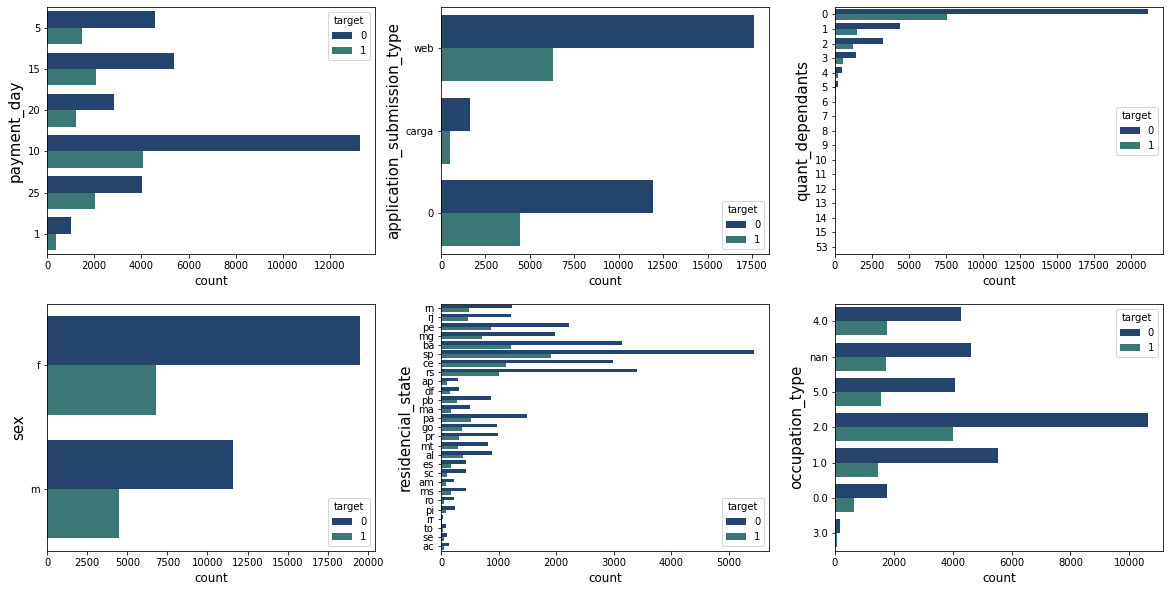

In [11]:
plt.figure(figsize = (20,10))
for i, variable in enumerate(count_plots2):
    sns.set_palette('gist_earth')
    ax = plt.subplot(2,3,i+1)
    sns.countplot(data=df, y=variable, hue='target')
    ax.set_xlabel('count', fontsize = 12)
    ax.set_ylabel(variable, fontsize = 15)

# plt.show()
plt.savefig('count_plots2.svg')

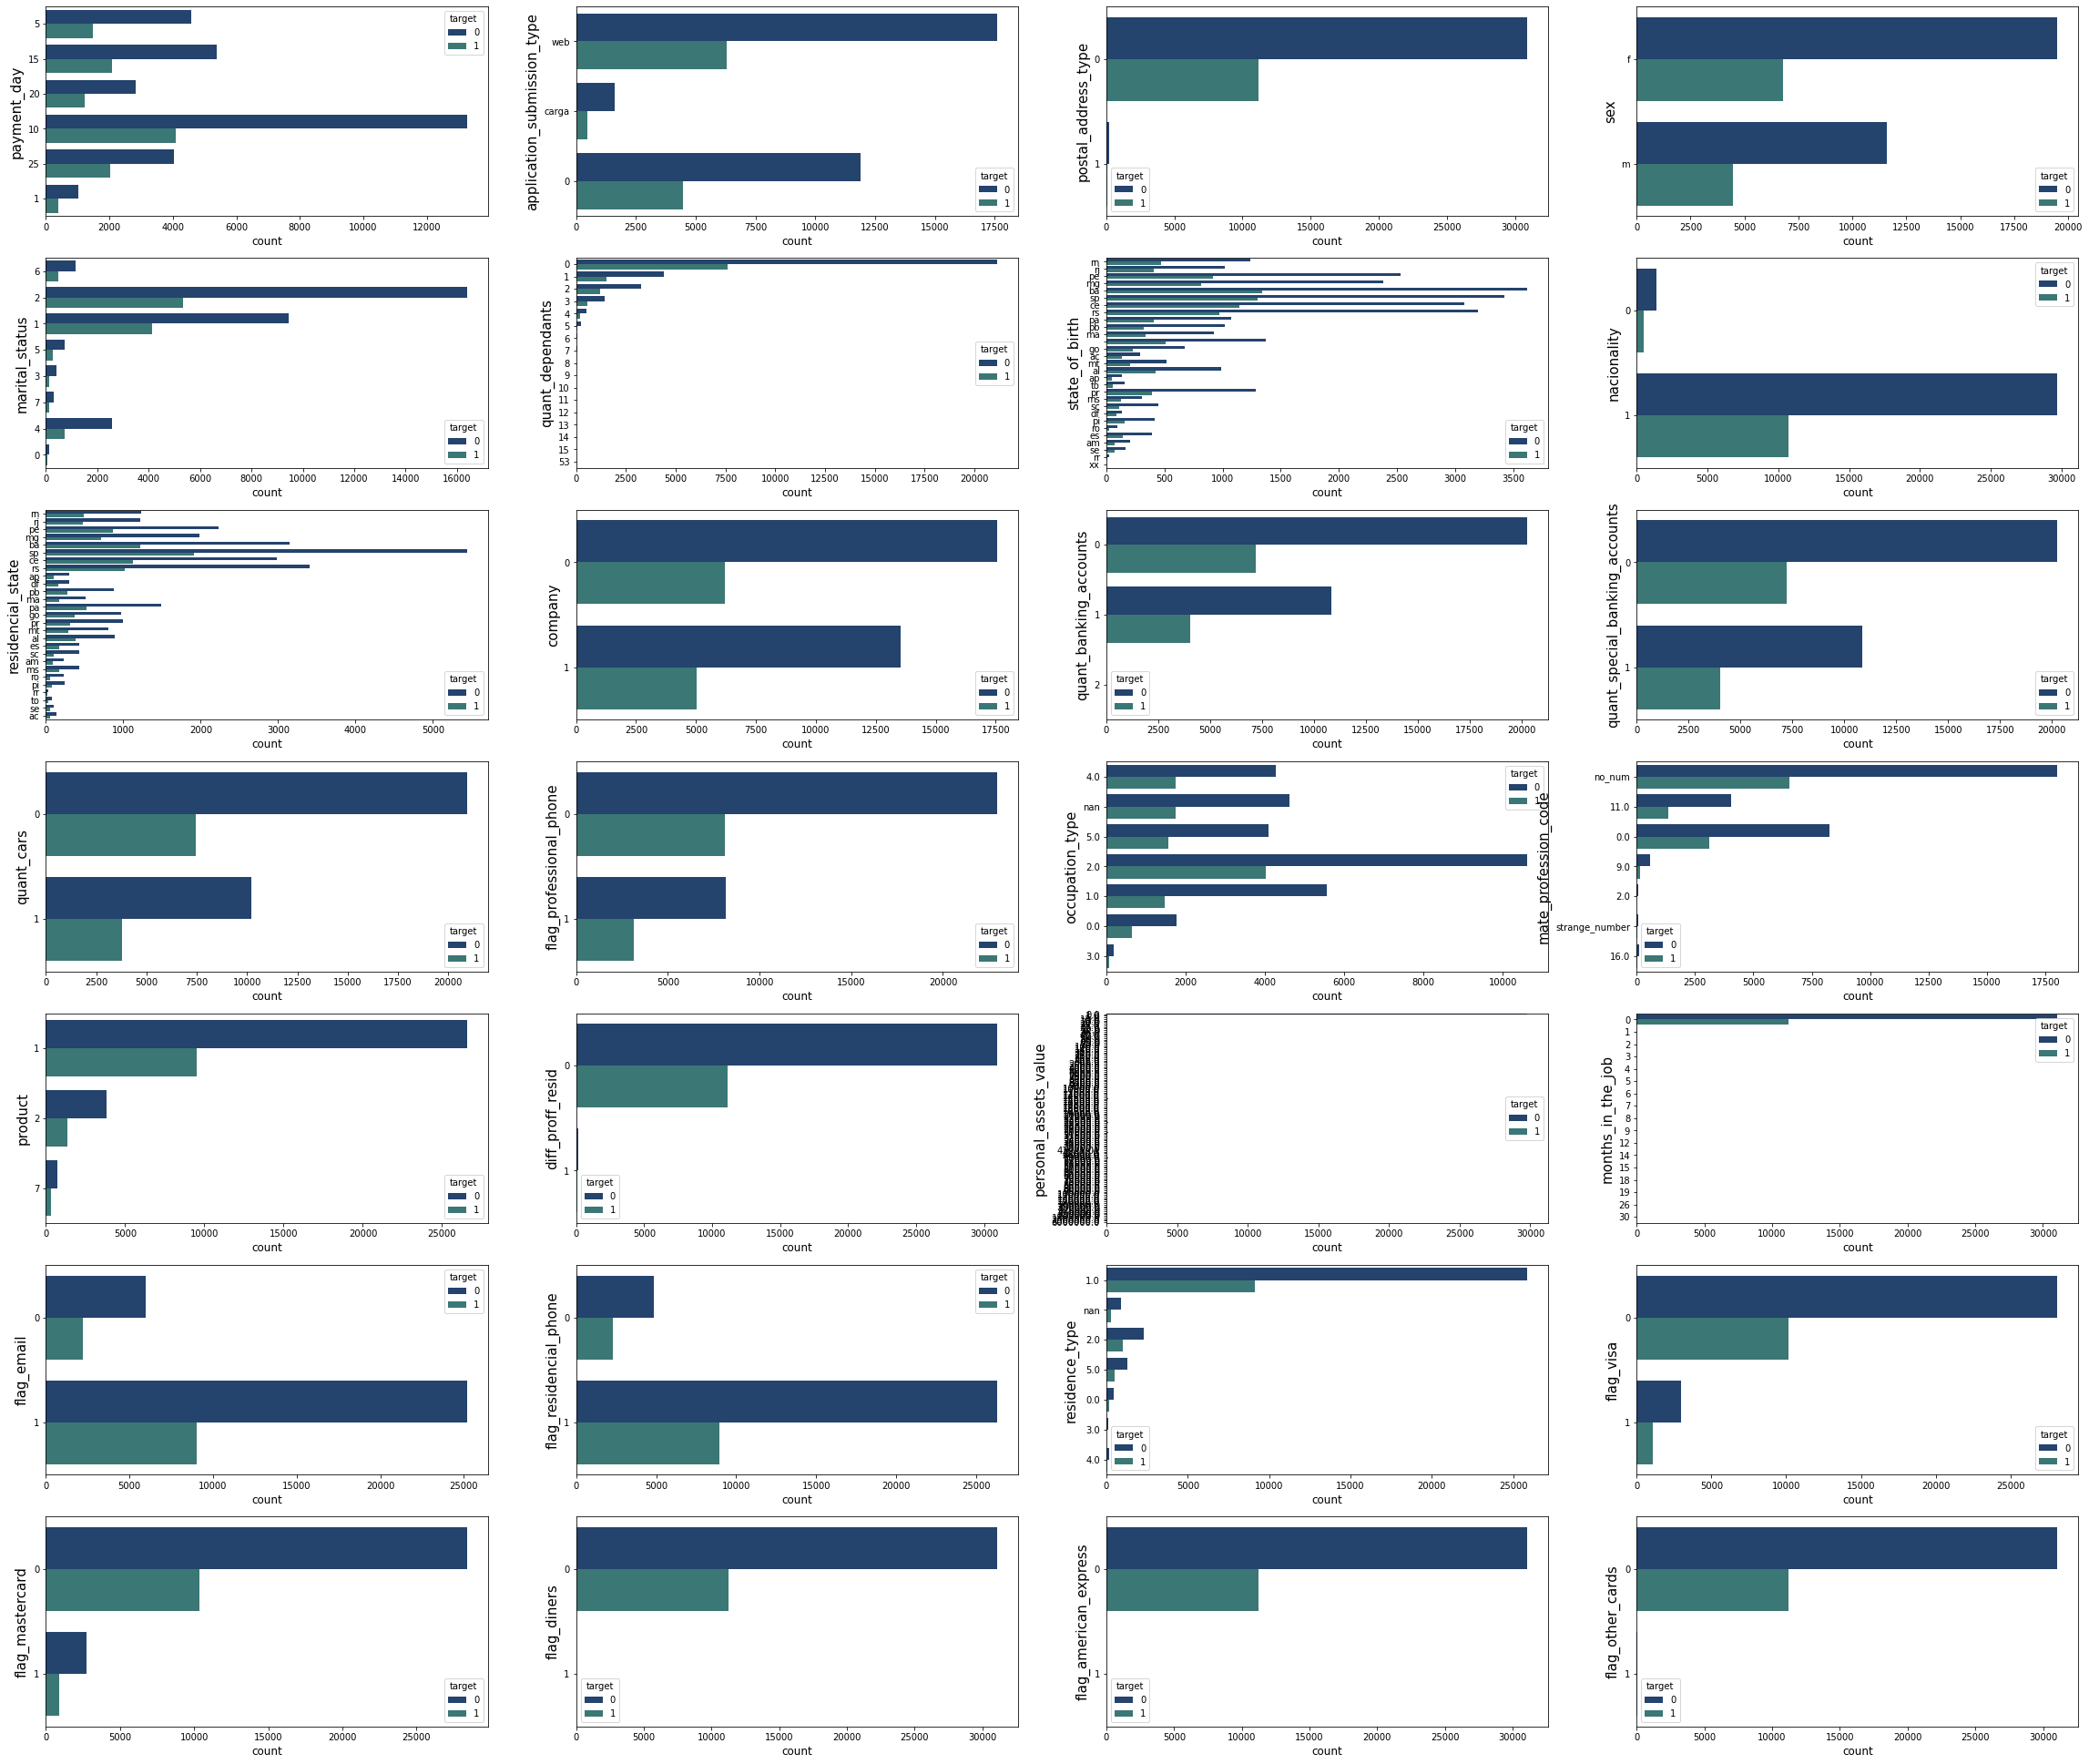

In [12]:
plt.figure(figsize = (40,50))
for i, variable in enumerate(count_plots1):
    sns.set_palette('gist_earth')
    ax = plt.subplot(10,4,i+1)
    sns.countplot(data=df, y=variable, hue='target')
    ax.set_xlabel('count', fontsize = 12)
    ax.set_ylabel(variable, fontsize = 15)

plt.savefig('count_plots.svg')
# plt.show()

- The overall data shows 73% of respondents are target = 0 and 27% are target = 1. 
- This pattern is evident across the countplots above.
- The countplots look at the number of target = 0 vs target = 1 across binary, categorical and ordinal variables.
- This implies that there is no clear relationship between an indiviudal being part of a certain group and their target type.

## Histplots

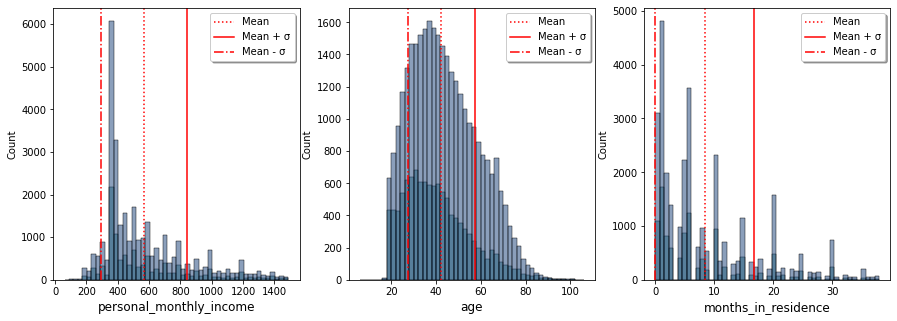

In [13]:
plt.figure(figsize = (15,5))
for i, variable in enumerate(cts):
    sns.set_palette('gist_earth')
    ax = plt.subplot(1,3,i+1)
    sns.histplot(data=df, x=variable, hue='target',alpha=0.5, bins=50, legend=True)
    plt.axvline(np.mean(df[variable]), color='red', linestyle=':')
    plt.axvline(np.mean(df[variable])+np.std(df[variable]), color='red', linestyle='-')
    plt.axvline(np.mean(df[variable])-np.std(df[variable]), color='red', linestyle='-.')
    plt.legend(('Mean', 'Mean + σ', 'Mean - σ'), loc=1, shadow=True)
    plt.xlabel(variable, fontsize=12)
#     ax.set_xlabel(variable, fontsize = 12)
#     ax.set_ylabel('count', fontsize = 12)
#     plt.gca().add_artist(legend1) 
#     fig, axes = plt.subplots(2, 1)
#     sns.boxplot(ax=axes[0], data=df, x=variable, y=df.target.astype('string'))
#     sns.violinplot(ax=axes[1], data=df, x=variable, y=df.target.astype('string'))
    

plt.savefig('hist_plots.svg')
# plt.show()

- The histogram plots show the continuous variables (age and monthly income) for target = 1 and target = 0.
- Given that majority of the data is target = 0, it is exprected that the distribution for this class will be larger.
- We dont see any major differences in the shape of distribution over the target classes. 
- Most people have earnings of between 300 abd 810
- Most people are in the age range of 35 and 59

## Boxplot and Violinplot

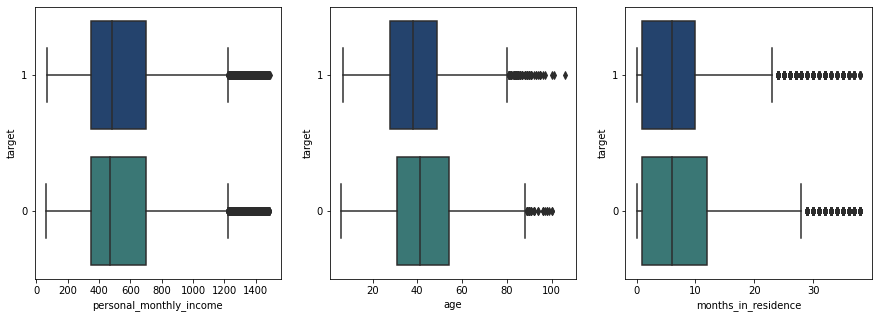

In [14]:
plt.figure(figsize = (15,5))
for i, variable in enumerate(cts):
    sns.set_palette('gist_earth')
    ax = plt.subplot(1,3,i+1)
    sns.boxplot(data=df, x=variable, y=df.target.astype('string'))
#     ax.set_xlabel(variable, fontsize = 15)
#     ax.set_ylabel('target', fontsize = 15)
#     sns.violinplot(ax=axes[1],data=new_df, x=variable, y=new_df.target.astype('string'))

plt.savefig('box_plots.svg')

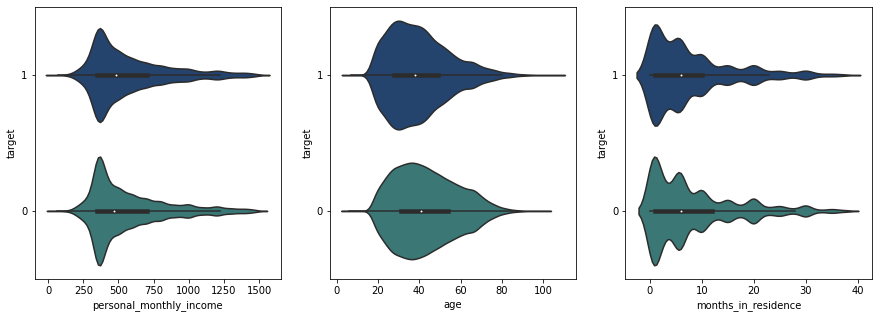

In [15]:
plt.figure(figsize = (15,5))
for i, variable in enumerate(cts):
    sns.set_palette('gist_earth')
    ax = plt.subplot(1,3,i+1)
#     sns.boxplot(data=new_df, x=variable, y=new_df.target.astype('string'))
    sns.violinplot(data=df, x=variable, y=df.target.astype('string'))


plt.savefig('violin_plots.svg')

- We see a similar trend in as the hist plot 
- We see that people who are target 0 have a slightly higher IQR 
- We also see quite a few outliers, even after cleaning the data 

## Conclusion

- None of our variables appear to be highly correlated with the probability of being a type 1 class.

# Modelling training and selection

splitting the training and test set

In [16]:
df = pd.get_dummies(df)
X = df.drop(['target'], axis = 1).values
y = df.target.values

ss = MinMaxScaler()
X = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Logistic

In [17]:
lr = LogisticRegression(C =2, tol = 0.0001)
lr.fit(X_train, y_train)
preds_lr = lr.predict_proba(X_test)[:,1]

/Users/viktoruymanov/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [18]:
roc_auc_score(y_test, preds_lr)

0.6215705576029287

In [19]:
sns.set_palette('bright')

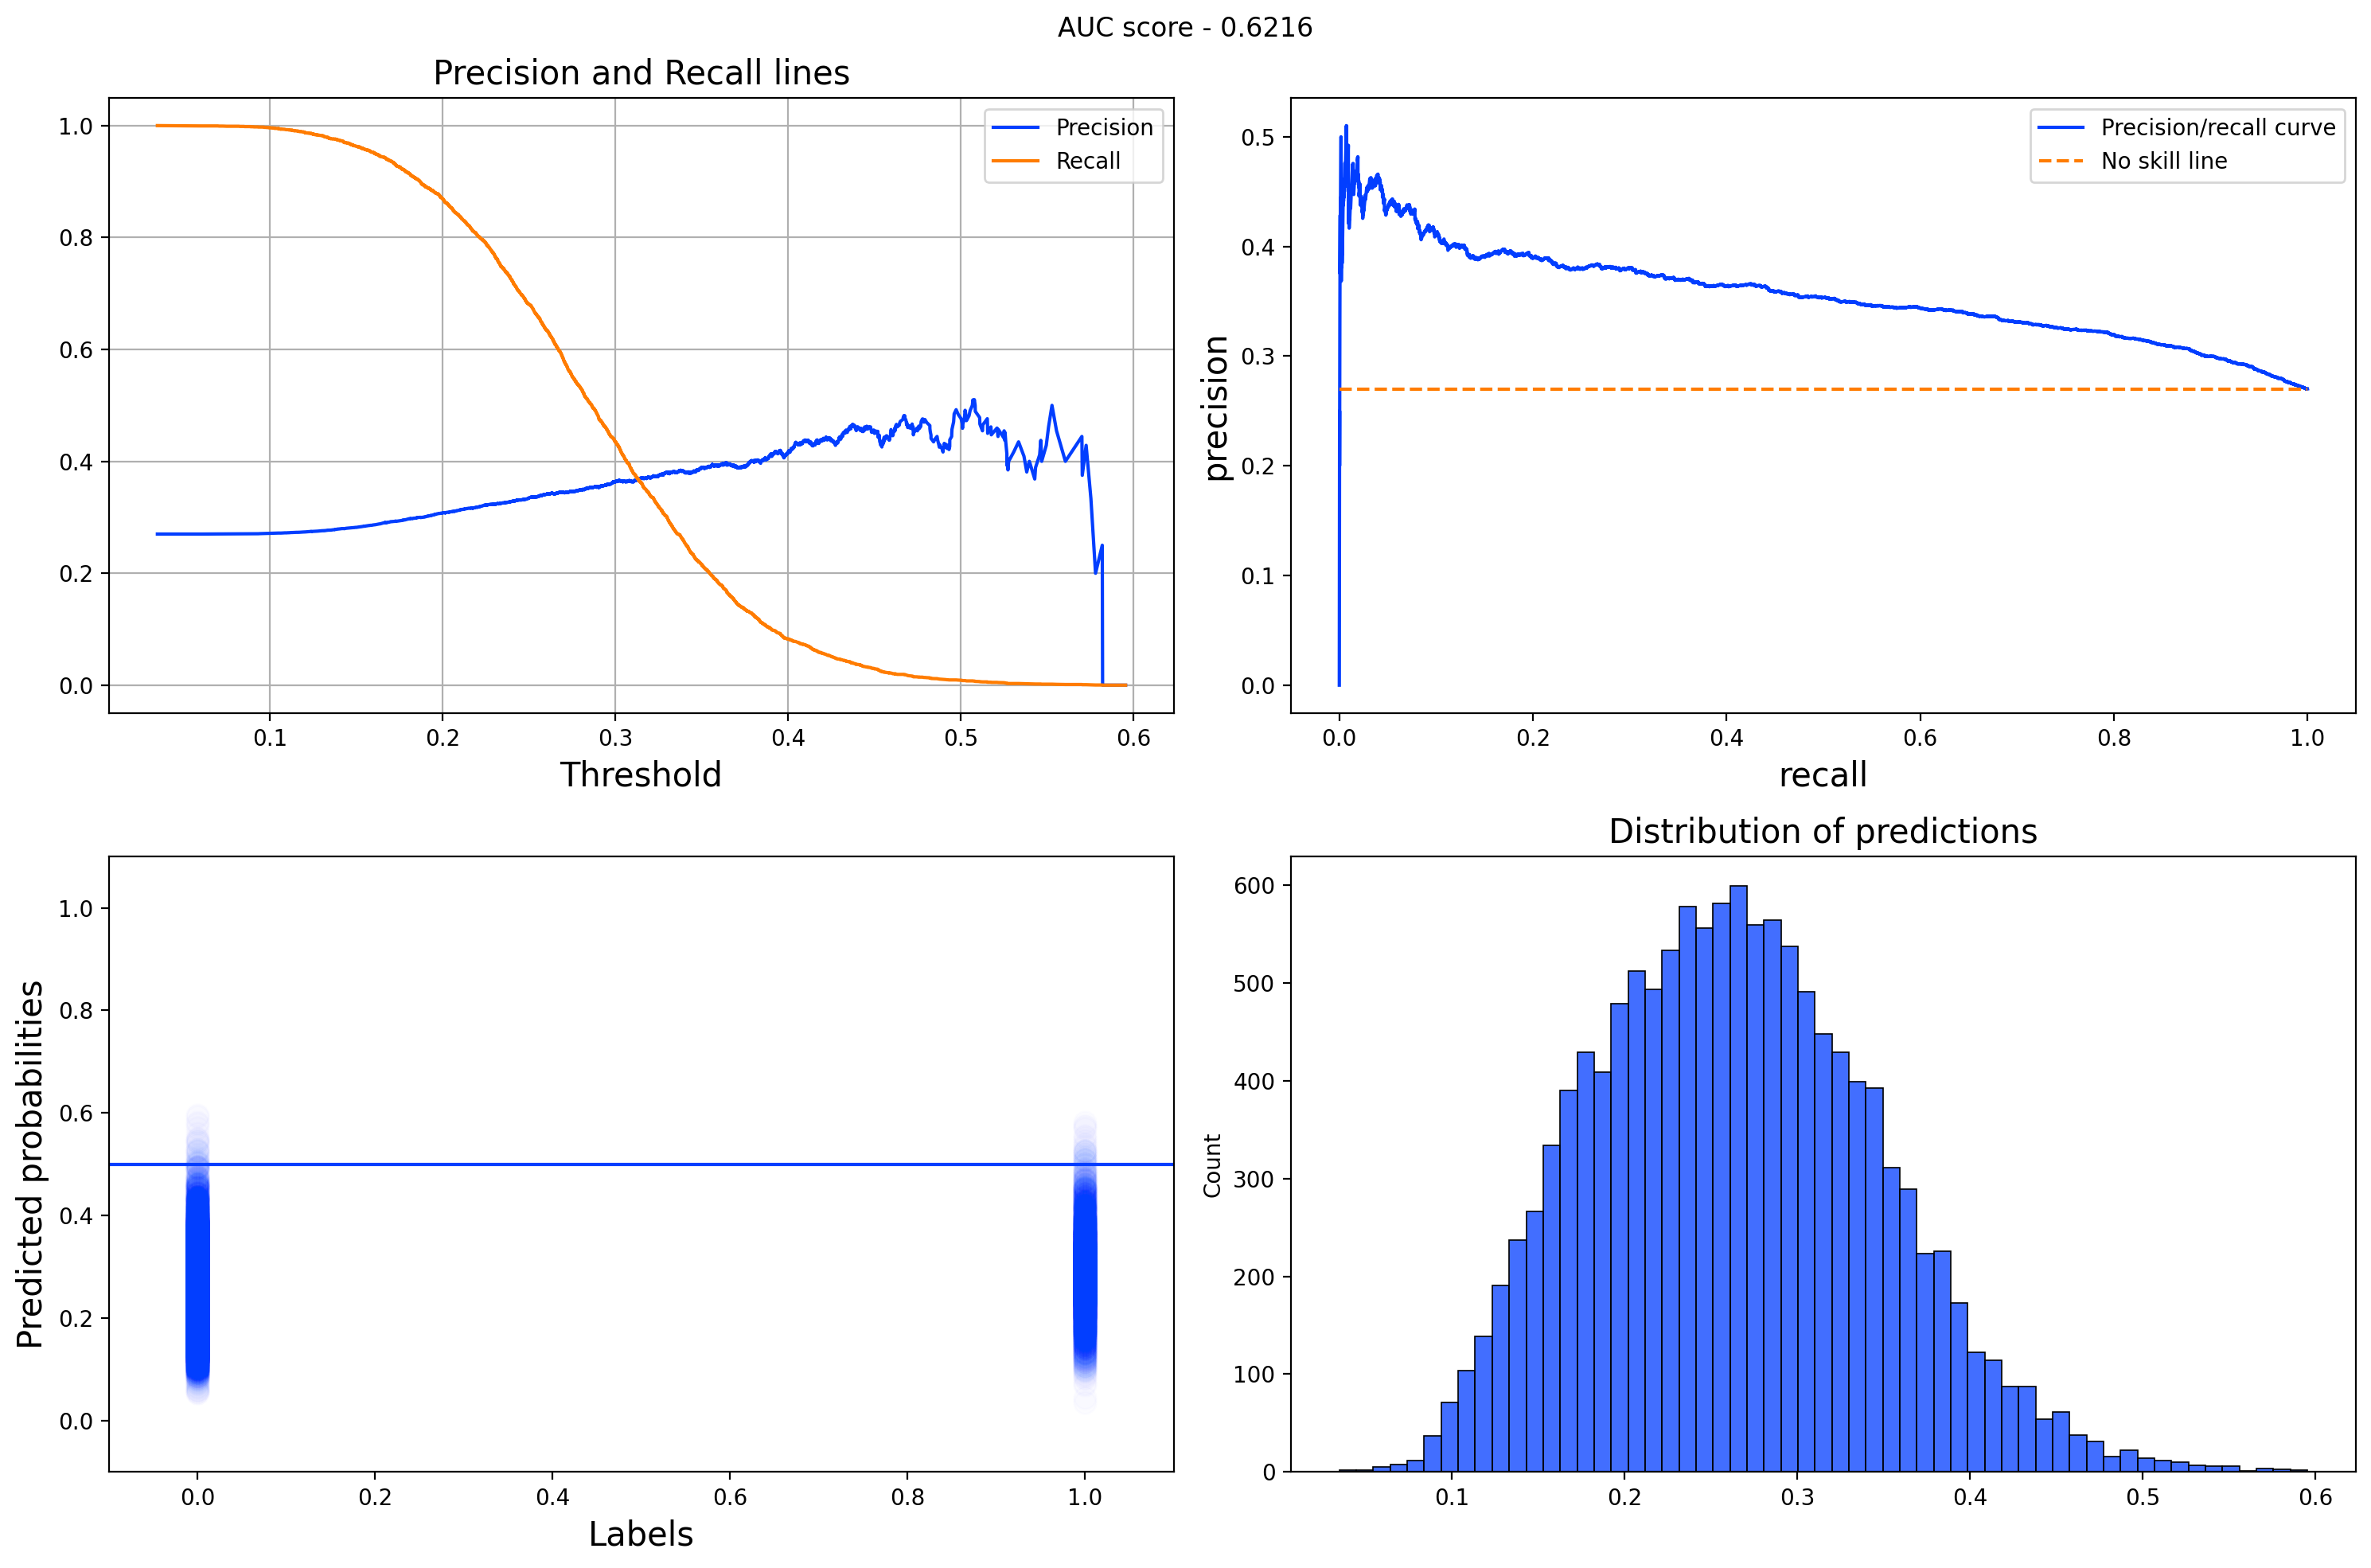

In [20]:
plot_auc_roc_prec(y_test, preds_lr)

## Random Forest

In [21]:
rf = RandomForestClassifier(min_samples_split = 5, n_jobs = -1, min_samples_leaf = 3, 
                           class_weight = {1:3, 0:1})

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 3}, min_samples_leaf=3,
                       min_samples_split=5, n_jobs=-1)

In [22]:
sum(y_train == 0)/y_train.shape[0]

0.7365651249873495

In [23]:
preds = rf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, preds)

0.6177856289685684

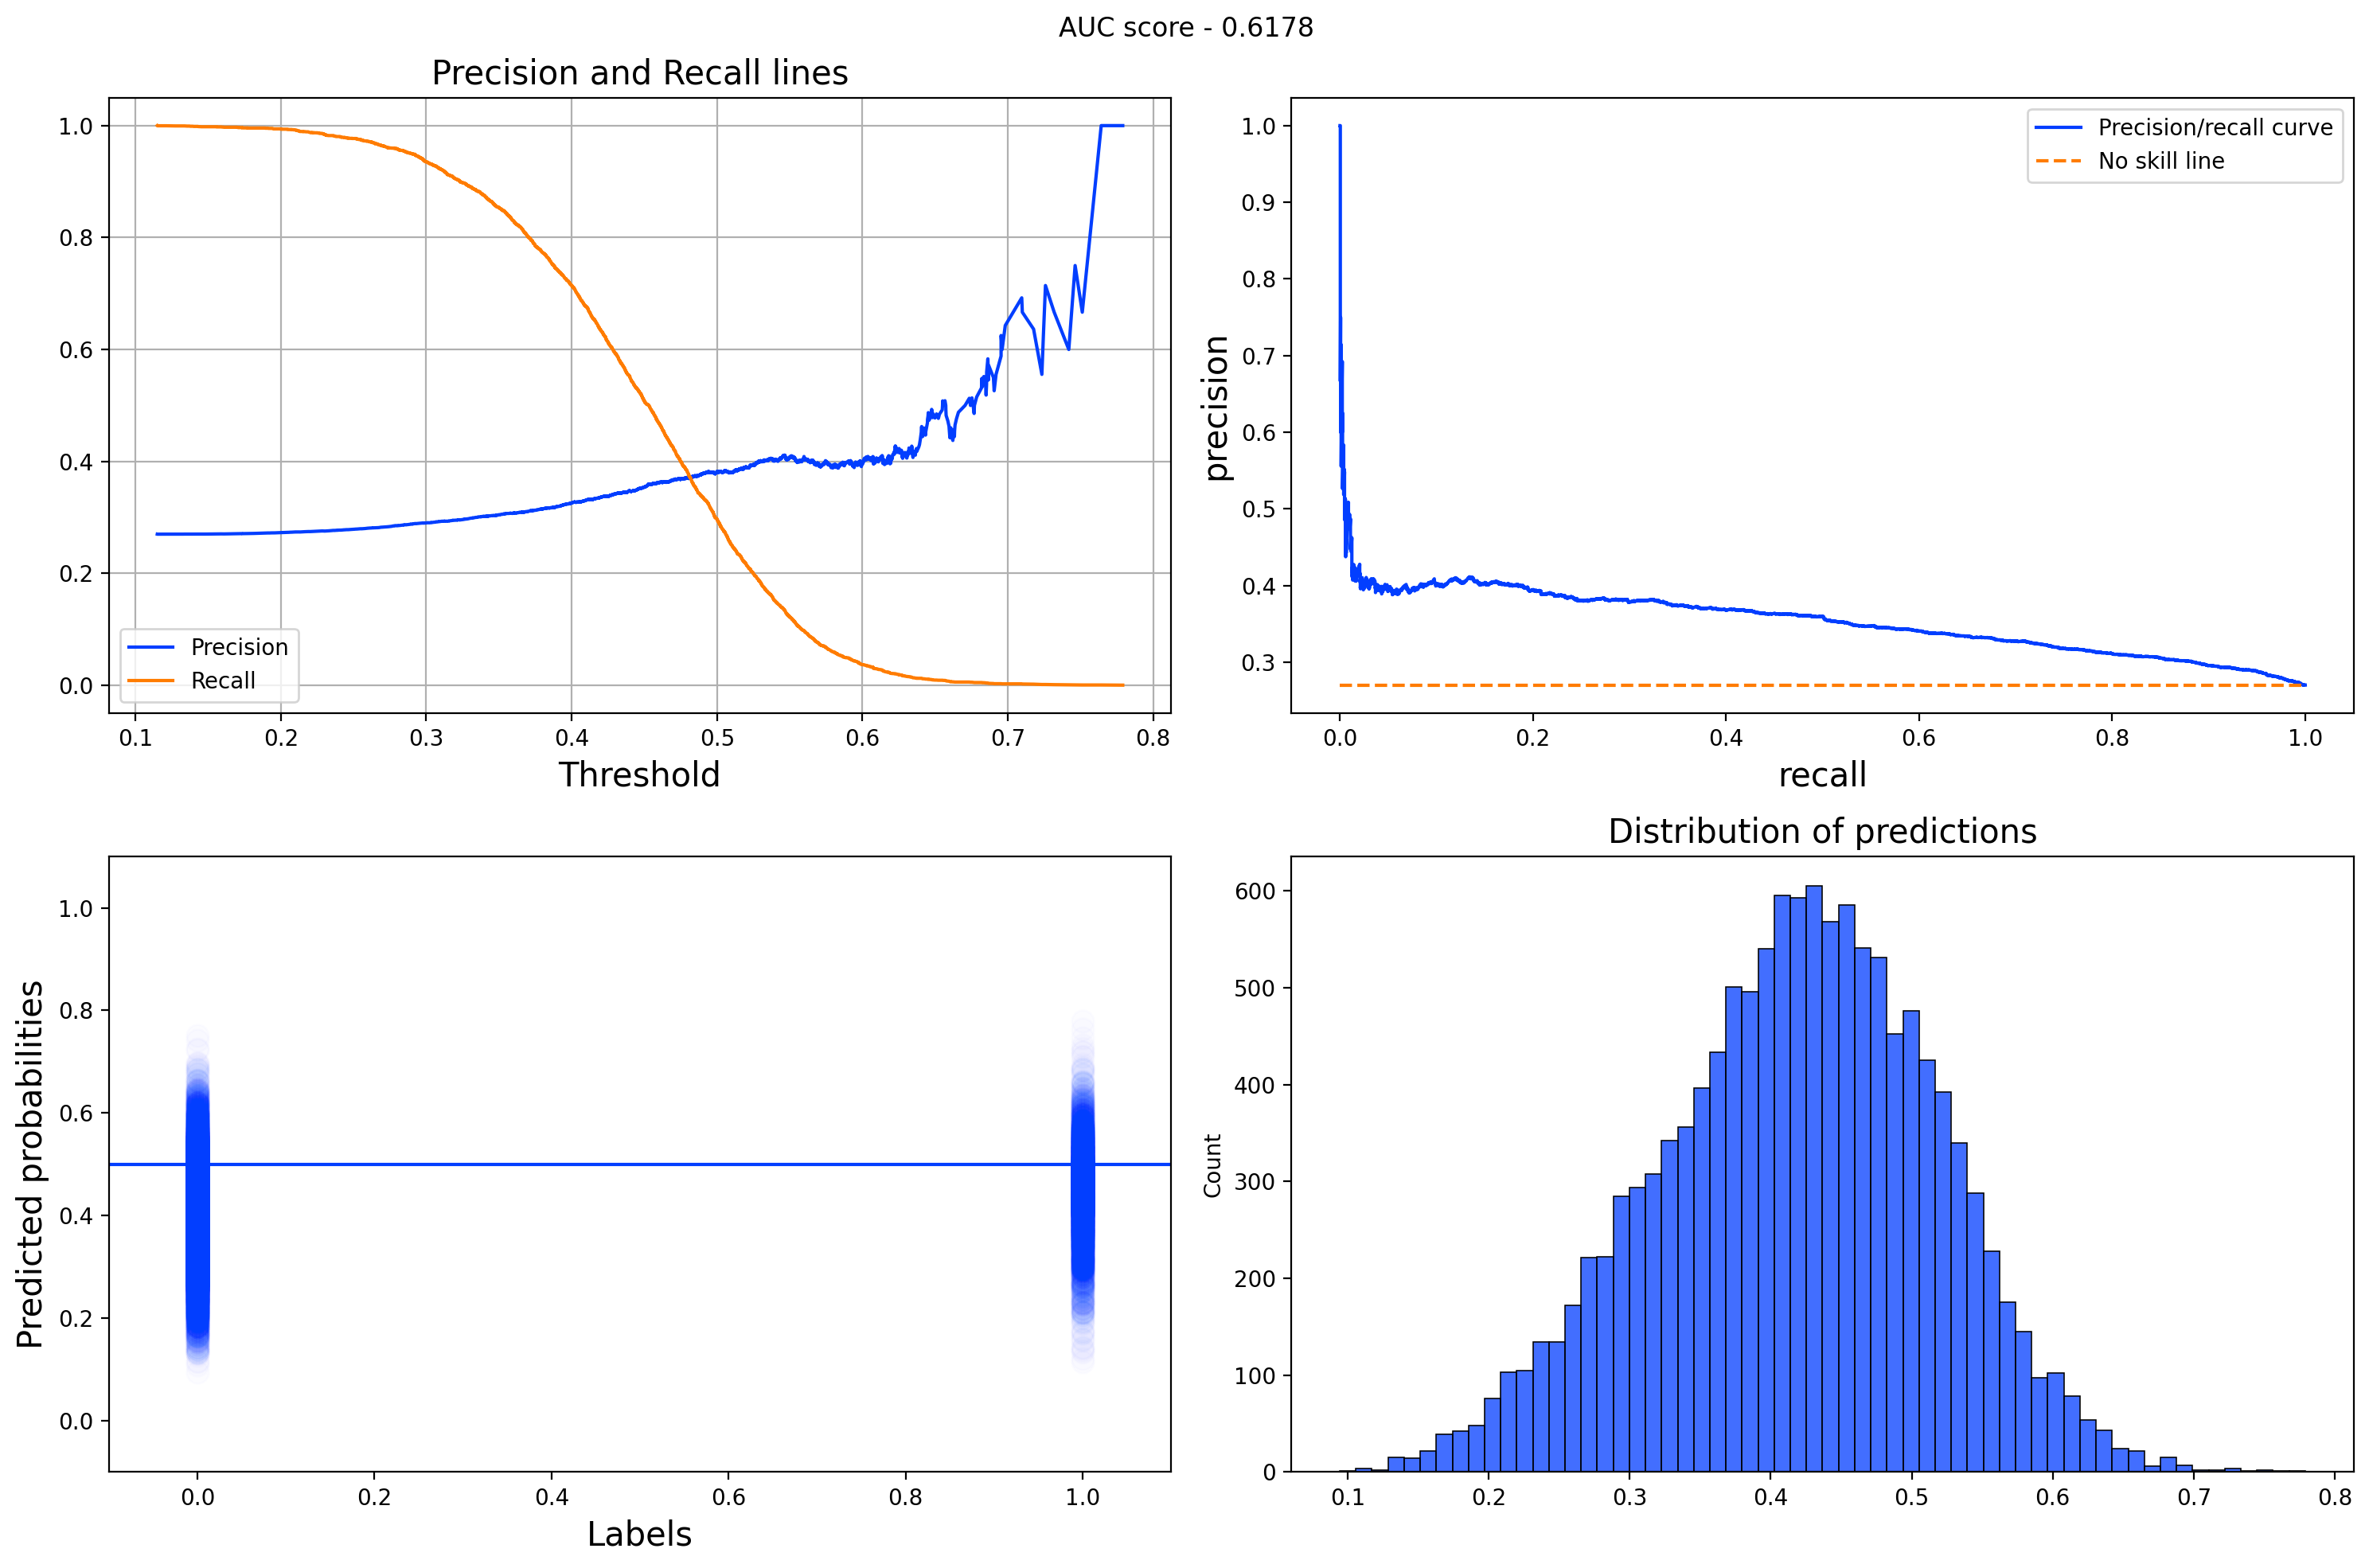

In [24]:

plot_auc_roc_prec(y_test, preds)

### PCA INCOMPETENCY

In [25]:
rf = RandomForestClassifier(min_samples_split = 5, n_jobs = -1, min_samples_leaf = 3, 
                           class_weight = {1:3, 0:1})

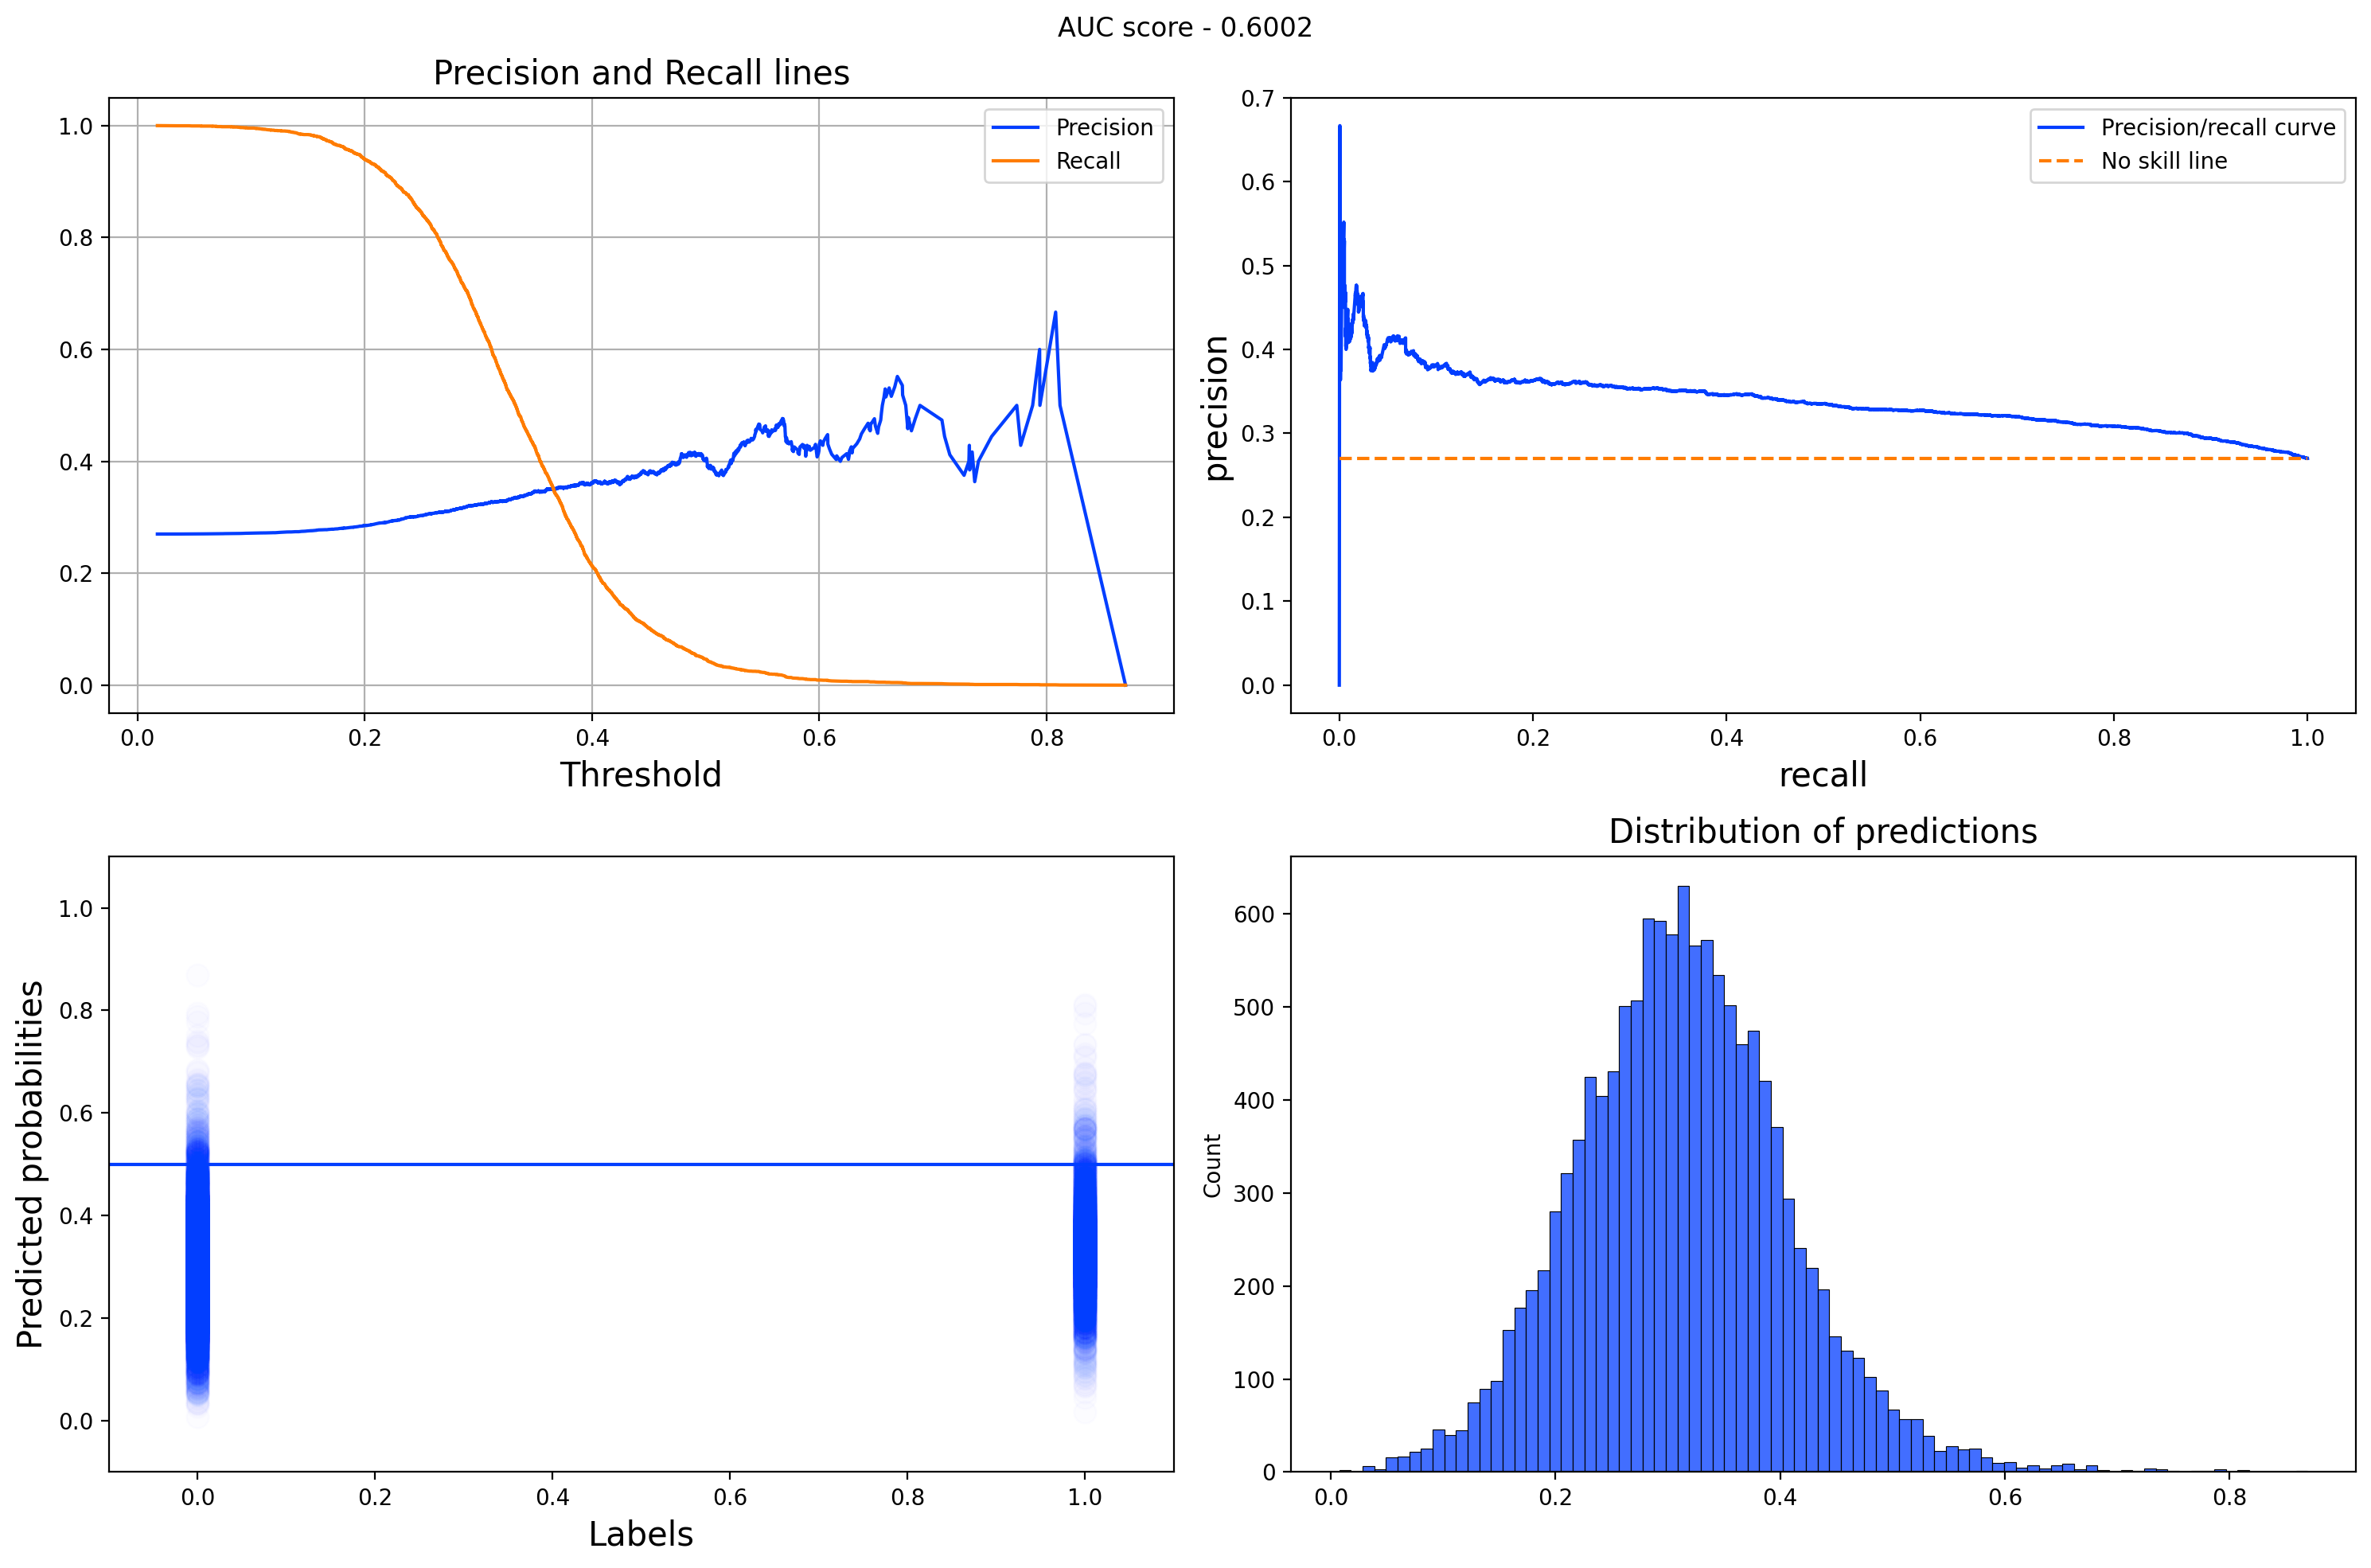

In [26]:
run_complete(rf, df, aug = False)

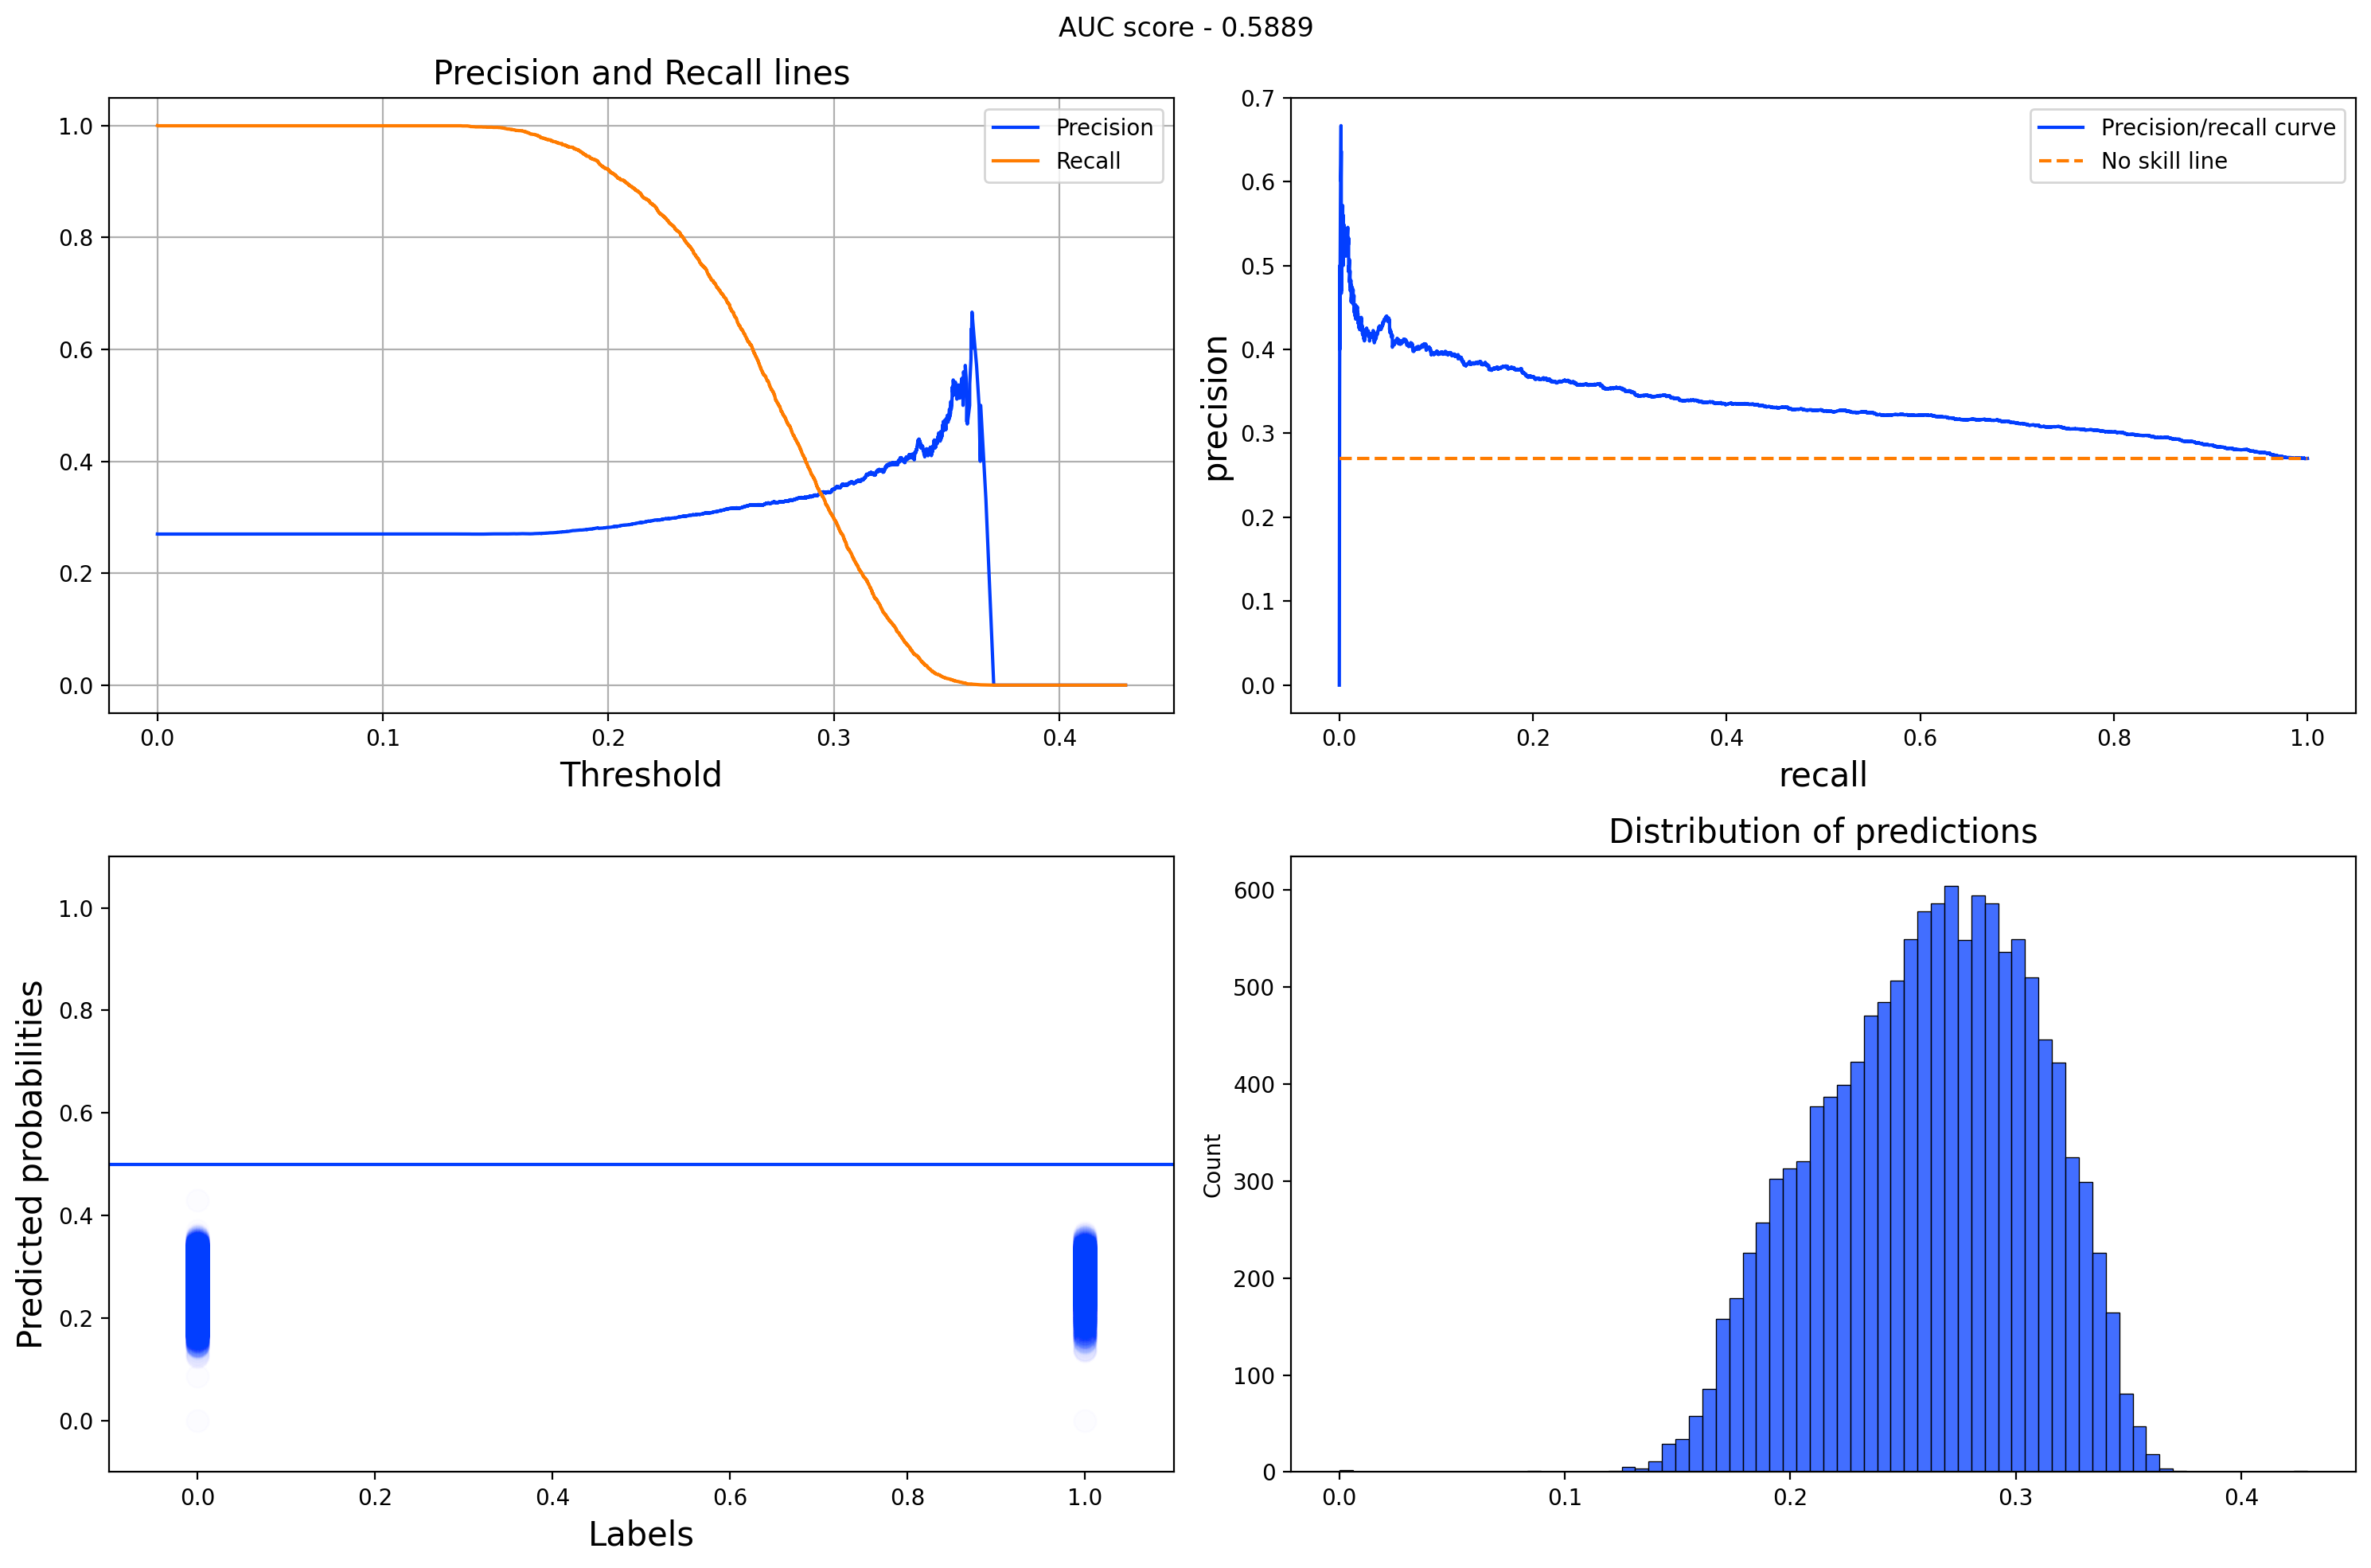

In [28]:
run_complete(lr, df, aug = False)

## logistic pca

## Boosting

In [28]:
param = {
    'bagging_freq': 3,
    'bagging_fraction': 0.3,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.1,
    'learning_rate': 0.01,
    'max_depth': -1,  
    'metric':'auc',
    'objective': 'binary', 
    'verbosity': -1
}
features = df.drop(['target'], axis = 1).columns.to_list()
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=44000)
oof = np.zeros(len(X_train))
predictions = np.zeros(len(X_test))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train, y_train)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(X_train[trn_idx], label=y_train[trn_idx])
    val_data = lgb.Dataset(X_train[val_idx], label=y_train[val_idx])

    num_round = 50_000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 1000)
    oof[val_idx] = clf.predict(X_train[val_idx], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(X_test, num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(y_train, oof)))

Fold 0
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.700776	valid_1's auc: 0.629065
[2000]	training's auc: 0.732758	valid_1's auc: 0.630434
Early stopping, best iteration is:
[1454]	training's auc: 0.71723	valid_1's auc: 0.631977
Fold 1
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.703945	valid_1's auc: 0.615352
[2000]	training's auc: 0.735273	valid_1's auc: 0.616693
[3000]	training's auc: 0.758983	valid_1's auc: 0.616366
Early stopping, best iteration is:
[2330]	training's auc: 0.744253	valid_1's auc: 0.617582
Fold 2
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.701708	valid_1's auc: 0.624618
[2000]	training's auc: 0.734867	valid_1's auc: 0.626743
Early stopping, best iteration is:
[1964]	training's auc: 0.734034	valid_1's auc: 0.626879
Fold 3
Training until validation scores don't improve for 1000 rounds
[1000]	training's auc: 0.70431	valid_1's auc: 0.605884
[

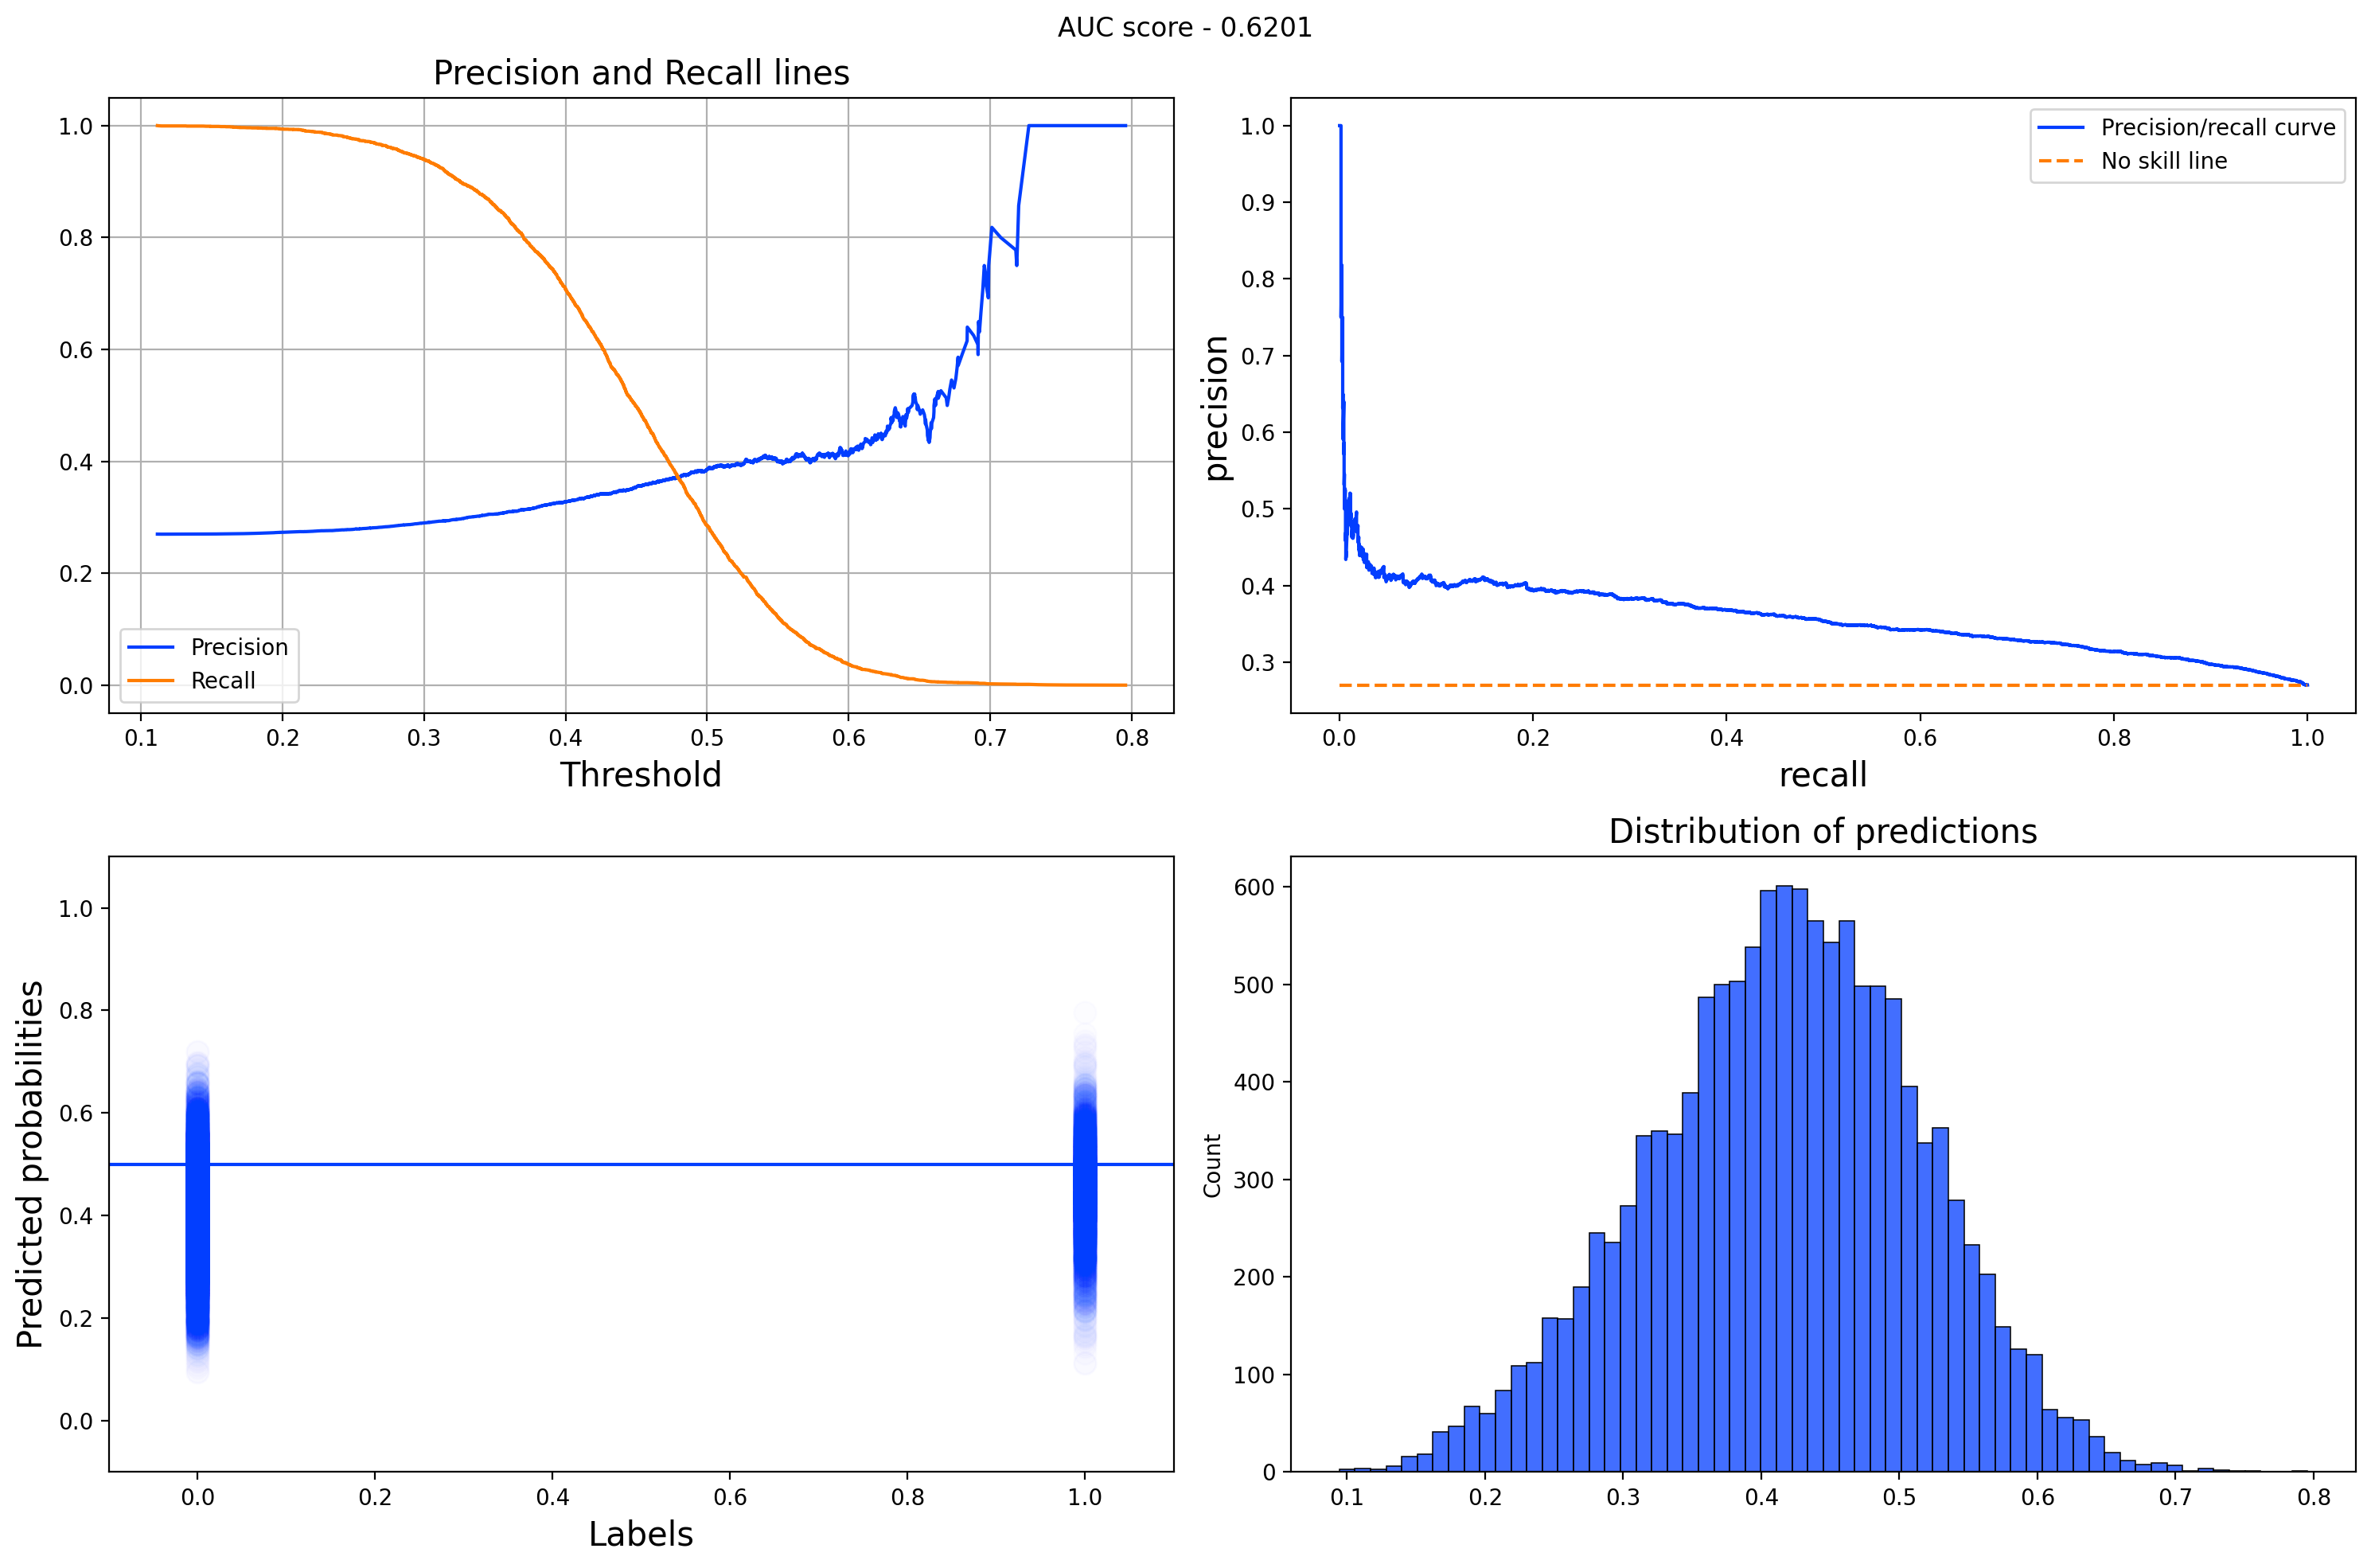

In [29]:
plot_auc_roc_prec(y_test, preds)

### Gradient Boosting feature importance

In [30]:
gb_importance = pd.DataFrame(clf.feature_importance().reshape(-1,1), index = df.drop(['target'], axis = 1).columns)

gb_importance.columns = ['Feature_importance']
gb_importance = gb_importance.reset_index()

In [31]:
gb_importance['Feature_importance'] = gb_importance.Feature_importance / gb_importance.Feature_importance.sum()
gb_importance = gb_importance.sort_values(by = 'Feature_importance', ascending = False).head(5)
gb_importance

,index,Feature_importance
6,personal_monthly_income,0.073213
20,age,0.058210
4,months_in_residence,0.055217
1,quant_dependants,0.026945
138,product_1,0.020073


In [39]:
feature_importance_df.groupby(['Feature']).sum()[['importance']].sort_values(by = 'importance', ascending = False).head(5)

,importance
Feature,
personal_monthly_income,26918
age,21511
months_in_residence,20101
quant_dependants,9755
product_1,7517


# Conclusion

The credit scoring process has proven to be an extremely valuable tool for organizations such as banks and financial institutions. 

Nevertheless, some extensive data pre-processing stages were carried out, covering missing values handling to variables standardization, solely for the purpose of enhancing the prediction performance. 

**Process:**
In this notebook, three main algorithms were used: Logistic Regression, Random Forest, and Gradient Boosting Decision Trees. Additionally, Lasso regularization was used as a variable shrinkage technique under logistic regression to support the feature selection criteria. 

**Results:** 
both Random Forest and Gradient Boosting can be powerful algorithms capable of handling both a large number of variables and imperfect data structure. This was in contrast to logistic regression, which was unable to match the importance of features and demonstrated low accuracy. Random forest and gradient boosting provided similar results in terms of AUC scores, thus contributing to significantly higher predictive power. 

**Further future work:** 
may be directed to other types of algorithms that have been widely used in credit scoring, such as Support Vector Machines and Neural Networks.